## Introduction

In other to gain insight into this problem we divide our analysis into

two main sections, the exploratory data analysis section and the predictive 

analysis section. In the first section of exploratory data analysis we gain 

a good understanding of the data and many of its characteristics. using this

analysis we draw some conclusions about features of the data and some of its

variables. The analysis of the first section yields important information and

insight in preparation for carrying out the analysis in the second section. In the 

second section we perform the predictive analytics steps aimed at predicting

two variables of the datasets, the placed variable and the length of time in program

variables. This analysis consist of several steps steps starting with preprocessing

of the dataset and culminating in presenting the result of several predictive models

which can be deployed to predict new unseen sample of the dataset. 




## Exploratory Data Analysis

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import scipy.stats as ss
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')
import pandas.util.testing as tm

We load the dataset into a pandas dataframe and observe the number of samples

and variables. We view the first few rows of the dataset using data.head(). We notice that some

variables have NAN  or missing values.


In [2]:
data = pd.read_excel('Data_Pathrise.xlsx')
print(data.shape)


(2544, 16)


In [3]:
data.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


we obtain a more detailed summary of the dataset using df.info() and df.describe()

from the result above we see that most of the variables have missing values.

we obtain summary of a few of the numerical variables to that the average 

placement rate for the entire dataset is about 0.376. The average number of

interview is 2.18 and the average number of application is 36.50, while the

average program duration days is roughly 136 days. The 25th, 50th and 75th

percentiles of these variables as well as other metrics are also reported in table above.

computing these same metrics for subset of applicants who are african americans or Black or

Afro-caribbean. we find a placement rate of 0.24 for these group significantly less than the

entire group while the mean of the other variables tend to similar in values to the ones obtained 

for the entire group.  


histogram plots of some of the numerical variables shows the distribution of those variables





In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [7]:
#numerical columns description
data1=data[['program_duration_days','number_of_interviews','number_of_applications']]
data.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


In [8]:
data2=data[data.race.isin(['Black, Afro-Caribbean, or African American'])]



In [9]:
data2.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,126.000000,91.000000,126.000000,115.000000,126.000000
mean,1314.888889,133.824176,0.246032,2.191304,34.698413
std,758.093717,151.917419,0.432417,3.164761,50.830584
min,7.000000,0.000000,0.000000,0.000000,0.000000
25%,568.250000,3.500000,0.000000,0.000000,8.000000
50%,1459.500000,61.000000,0.000000,1.000000,15.000000
75%,1868.250000,244.500000,0.000000,3.000000,40.000000
max,2533.000000,522.000000,1.000000,20.000000,350.000000


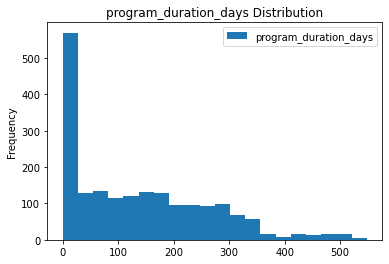

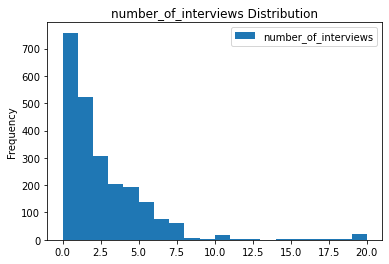

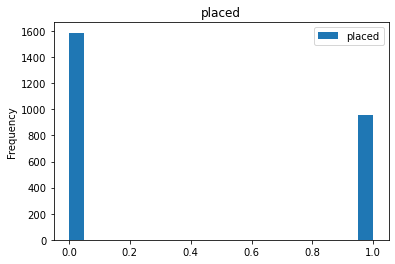

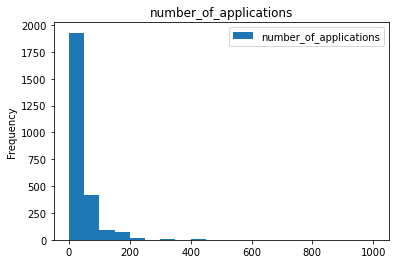

In [10]:
data[['program_duration_days']].plot.hist(bins = 20, title = 'program_duration_days Distribution')
data[['number_of_interviews']].plot.hist(bins = 20, title = 'number_of_interviews Distribution')
data[['placed']].plot.hist(bins = 20, title = 'placed')
data[['number_of_applications']].plot.hist(bins = 20, title = 'number_of_applications')


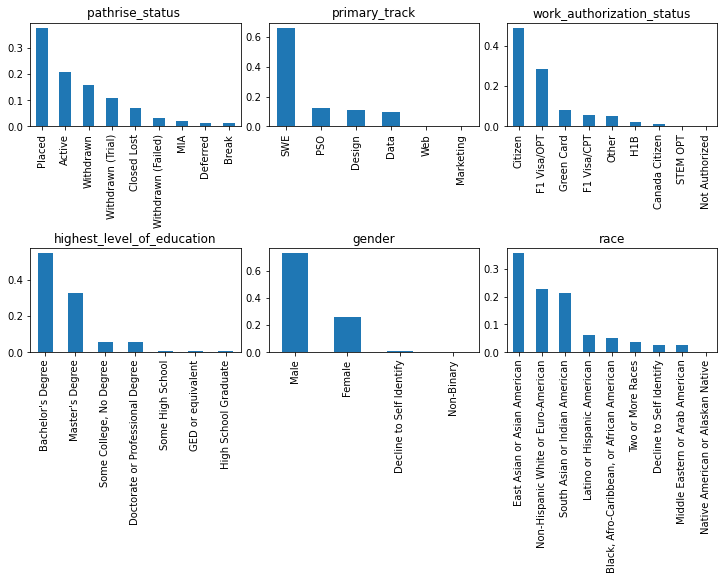

In [11]:
plt.subplot(231)
data.pathrise_status.value_counts(normalize=True).plot(kind = 'bar', title = "pathrise_status ",figsize=(10,8))
plt.tight_layout(pad=0.5)

plt.subplot(232)
data.primary_track.value_counts(normalize=True).plot(kind = 'bar', title = "primary_track")
plt.tight_layout(pad=0.5)

plt.subplot(233)
data.work_authorization_status.value_counts(normalize=True).plot(kind = 'bar', title = "work_authorization_status")
plt.tight_layout(pad=0.5)

plt.subplot(234)
data.highest_level_of_education.value_counts(normalize=True).plot(kind = 'bar',title = "highest_level_of_education")
plt.tight_layout(pad=0.5)

plt.subplot(235)
data.gender.value_counts(normalize=True).plot(kind = 'bar',title = "gender")
plt.tight_layout(pad=0.5)

plt.subplot(236)
data.race.value_counts(normalize=True).plot(kind = 'bar',title = "race")
plt.tight_layout(pad=0.5)



In [12]:
data.program_duration_days.value_counts()

0.0      217
13.0      34
11.0      27
12.0      25
14.0      22
        ... 
283.0      1
205.0      1
262.0      1
350.0      1
519.0      1
Name: program_duration_days, Length: 411, dtype: int64

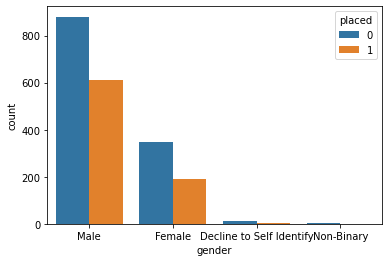

In [15]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="gender", hue='placed', data=data)


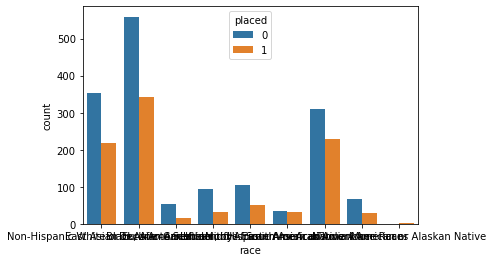

In [16]:
sns.countplot(x="race", hue='placed', data=data)


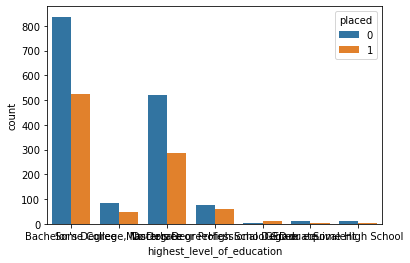

In [17]:
sns.countplot(x="highest_level_of_education", hue='placed', data=data)


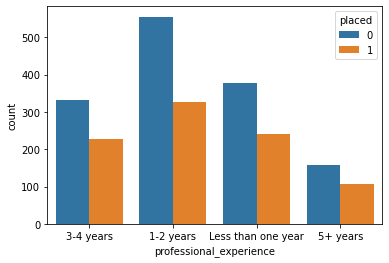

In [18]:
sns.countplot(x="professional_experience", hue='placed', data=data)


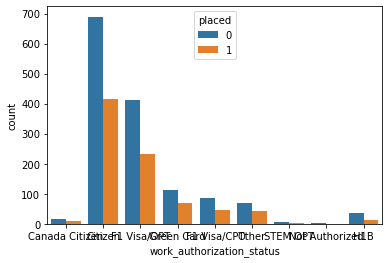

In [19]:
sns.countplot(x="work_authorization_status", hue='placed', data=data)


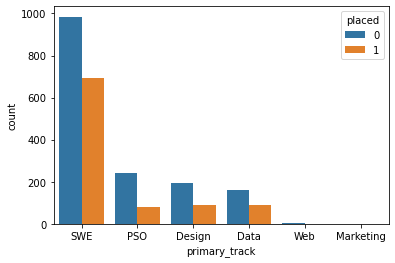

In [20]:
sns.countplot(x="primary_track", hue='placed', data=data)

,id,program_duration_days,placed,number_of_interviews,number_of_applications
id,1.000000,0.041449,-0.035391,-0.015318,-0.072675
program_duration_days,0.041449,1.000000,0.197222,-0.065043,-0.064783
placed,-0.035391,0.197222,1.000000,-0.007156,-0.028364
number_of_interviews,-0.015318,-0.065043,-0.007156,1.000000,0.071406
number_of_applications,-0.072675,-0.064783,-0.028364,0.071406,1.000000


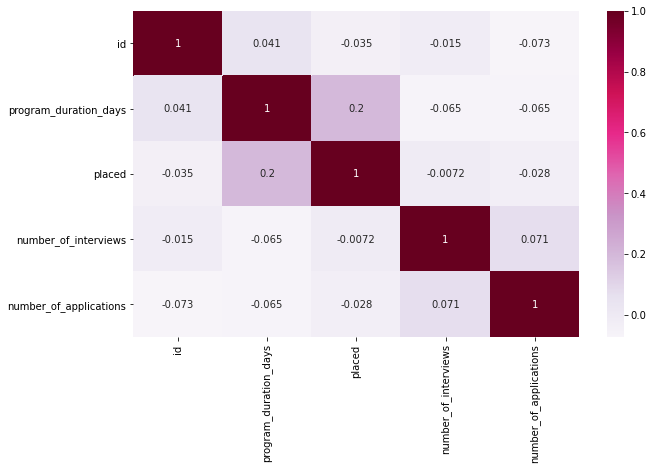

In [21]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(10,6))
sns.heatmap(matrix, vmax=1,cmap="PuRd",annot=True)

matrix

In [22]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

#matrix = cramers_v(data)
val = cramers_v(data['placed'],data['gender'])
print(val)
val1 = cramers_v(data['placed'],data['race'])
print(val1)
val2 = cramers_v(data['placed'],data['highest_level_of_education'])
print(val2)
val3 = cramers_v(data['placed'],data['length_of_job_search'])
print(val3)
val4 = cramers_v(data['placed'],data['professional_experience'])
print(val4)
val5 = cramers_v(data['placed'],data['work_authorization_status'])
print(val5)

0.0565038582710225
0.09626776875489286
0.04152603541568362
0.032241611205785586
0.0
0.0


# Predictive Analytics

We have two learning task in this project, predicting the length of program duration for each applicant and predicting

the placement or otherwise of an applicant. These are regression and classification problems respectively. We try to use

the other variables to predict these two variables but before we can build our prediction models we must first determine the

relative importance of our other variables in predicting each of these two target variables. We use three methods to determine

important variables for our models resulting in a collection of 6 subset of features 3 for classification and 3 for regression

on which we build our learning models. The details of these are given below.



## Preprocessing

There are two preprocessing step we must carry out before we begin to derive insight from the data 

using statistical and learning algorithms. The first is imputation of missing values and the second is 

encoding of categorical data. we find from a previous step in the exploratory data analysis section that

most of the variables in the datasets have missing values. These missing values presents some difficulty

to some algorithms so the practice is to find a good way to deal with them. The other problem with the raw

dataset is the presence of non-float or int values in the categorical variables. This also present difficulties

for some algorithms that have been designed to work only with floats and int. We must resolve these two issues 

before we proceed.  Generally there are two options to resolve missing values issues, the first is to discard rows 

with missing values and the second is to find some way of setting those missing values to reasonable values. 

In the present case as can be seen below removing entire rows with NaN or missing values leaves us with a 

significantly smaller amount of total number of samples. The number of samples was reduced to around 988 from

about 2544 when we discarded samples with missing values. This is a very big loss of valuable data. A better approach 

would be to fill in the missing values with reasonable values. In this case we choose to input them with the modal

values from each categorical variable or the mean of each numerical variable. This seem very much like a reasonable thing 

to do and is easily accomplished. Granted there are other more sophisticated methods of missing value inputation that

we may use this method is very straighforward and intutive. The second problem with the raw dataset is solved by way of 

integer encoding for instance rather than have 'Male' and  'Female' in the gender variable we may choose to encode

them with the integers 1 and 0 respectively. Doing so for all other categorical variables resolves the issues with

non-float or non-int variable values. We make these two changes to our datasets and obtain a dataset that is ready for 

modelling.

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import scipy.stats as ss
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')
import pandas.util.testing as tm


data = pd.read_excel('Data_Pathrise.xlsx')

data3=data
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [63]:
data4=data3.dropna()
data4.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 2 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           988 non-null    int64  
 1   pathrise_status              988 non-null    object 
 2   primary_track                988 non-null    object 
 3   cohort_tag                   988 non-null    object 
 4   program_duration_days        988 non-null    float64
 5   placed                       988 non-null    int64  
 6   employment_status            988 non-null    object 
 7   highest_level_of_education   988 non-null    object 
 8   length_of_job_search         988 non-null    object 
 9   biggest_challenge_in_search  988 non-null    object 
 10  professional_experience      988 non-null    object 
 11  work_authorization_status    988 non-null    object 
 12  number_of_interviews         988 non-null    float64
 13  number_of_applicati

In [64]:
data5=data3.drop(data3.columns[6], axis=1)
data5['emp_stat']=data3.iloc[:,6]

data3=data5

dfmode=data3.mode().head(1)
print(dfmode.race[0])
data3 = data3.fillna({"race": dfmode.race[0]})
data3 = data3.fillna({"gender": dfmode.gender[0]})
data3 = data3.fillna({"number_of_interviews": dfmode.number_of_interviews[0]})
data3 = data3.fillna({"number_of_applications": dfmode.number_of_applications[0]})


data3 = data3.fillna({"work_authorization_status": dfmode.work_authorization_status[0]})
data3 = data3.fillna({"professional_experience": dfmode.professional_experience[0]})
data3 = data3.fillna({"biggest_challenge_in_search": dfmode.biggest_challenge_in_search[0]})
data3 = data3.fillna({"length_of_job_search": dfmode.length_of_job_search[0]})

data3 = data3.fillna({"highest_level_of_education": dfmode.highest_level_of_education[0]})
data3 = data3.fillna({"emp_stat": dfmode.emp_stat[0]})
data3 = data3.fillna({"program_duration_days": dfmode.program_duration_days[0]})
data3 = data3.fillna({"cohort_tag": dfmode.cohort_tag[0]})

data3.info()



data3.info()
data3.to_csv("Data_Pathrise2.csv", index=False)

East Asian or Asian American
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2544 non-null   object 
 4   program_duration_days        2544 non-null   float64
 5   placed                       2544 non-null   int64  
 6   highest_level_of_education   2544 non-null   object 
 7   length_of_job_search         2544 non-null   object 
 8   biggest_challenge_in_search  2544 non-null   object 
 9   professional_experience      2544 non-null   object 
 10  work_authorization_status    2544 non-null   object 
 11  number_of_interviews         2544 non-null   float64
 12  number_of_applications       2544 non-null   in

## Encoding of categorical variables

In [65]:
#data3["race"] = data3["race"].astype('category')
#data3.dtypes
#data3["race"] = data3["race"].cat.codes

for c in ["emp_stat","placed","race","gender","work_authorization_status","professional_experience","biggest_challenge_in_search","length_of_job_search","highest_level_of_education","cohort_tag","primary_track","pathrise_status"]:

          data3[c] = data3[c].astype('category')
          data3.dtypes
          data3[c] = data3[c].cat.codes



data3.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,emp_stat
0,1,0,4,39,0.0,0,0,1,5,1,0,2.0,900,2,6,4
1,2,0,3,20,0.0,0,5,1,2,0,1,6.0,0,2,6,4
2,3,2,1,7,0.0,0,4,3,1,3,1,0.0,0,2,2,2
3,4,2,3,7,0.0,0,0,3,2,3,1,5.0,25,2,1,0
4,5,5,4,6,89.0,1,0,0,5,0,3,10.0,100,2,2,4


In [66]:
data3[data3.isnull().any(axis=1)]
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   int8   
 2   primary_track                2544 non-null   int8   
 3   cohort_tag                   2544 non-null   int8   
 4   program_duration_days        2544 non-null   float64
 5   placed                       2544 non-null   int8   
 6   highest_level_of_education   2544 non-null   int8   
 7   length_of_job_search         2544 non-null   int8   
 8   biggest_challenge_in_search  2544 non-null   int8   
 9   professional_experience      2544 non-null   int8   
 10  work_authorization_status    2544 non-null   int8   
 11  number_of_interviews         2544 non-null   float64
 12  number_of_applications       2544 non-null   int64  
 13  gender            

In tne next sections we try to determine the relative importance of our features or variables in predicting the  variables we are interested in. In the next six sections we use three methods of feature selection on each of the two classification and regression problems

##  Feature  Importance  Classification

In [92]:
from sklearn.model_selection import train_test_split


In [93]:
y=data3['placed']
X=data3.drop(columns=['pathrise_status','id','program_duration_days','placed'])

X.to_csv("Data_Pathrise3.csv", index=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score



rf=RandomForestClassifier(n_estimators=10,n_jobs=50)
rf.fit(X_train, y_train)

#print(rf.predict(X_train))


print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, rf.predict(X_train)))
print('Precision:', precision_score(y_train, rf.predict(X_train)))
print('Recall:', recall_score(y_train, rf.predict(X_train)))

print('Accuracy:', rf.fit(X_train, y_train).score(X_train,y_train))


print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, rf.predict(X_test)))
print('Precision:', precision_score(y_test, rf.predict(X_test)))
print('Recall:', recall_score(y_test, rf.predict(X_test)))

Training set metrics:
Accuracy: 0.9758426966292135
Precision: 0.9984496124031008
Recall: 0.9387755102040817
Accuracy: 0.9780898876404495
Test set metrics:
Accuracy: 0.6164921465968587
Precision: 0.4276729559748428
Recall: 0.2518518518518518


In [95]:
rf.fit(X_train, y_train)

col_sorted_by_importance=rf.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':X.columns[col_sorted_by_importance],
    'imps':rf.feature_importances_[col_sorted_by_importance]
})


                           cols      imps
11                   cohort_tag  0.171112
10       number_of_applications  0.146189
9   biggest_challenge_in_search  0.101939
8          number_of_interviews  0.097549
7                          race  0.087173
6          length_of_job_search  0.079620
5                      emp_stat  0.077599
4     work_authorization_status  0.064575
3    highest_level_of_education  0.057551
2       professional_experience  0.050740
1                 primary_track  0.038730
0                        gender  0.027223


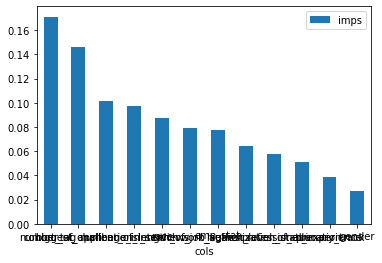

In [96]:
feat_imp=feat_imp.sort_values(by='imps',ascending=False)
feat_imp.plot.bar(x='cols',y='imps',rot=0)
print(feat_imp)

In [97]:
X_new1=X[feat_imp.iloc[0:5,0].tolist()]
y_new1=y

#rf.fit(X_new1, y_new1)


##  Feature  Importance  Regression

In [98]:
from sklearn.ensemble import AdaBoostRegressor

In [99]:

y=data3['program_duration_days']
X=data3.drop(columns=['pathrise_status','id','program_duration_days','placed'])
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)



In [100]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=10)
#regr.fit(X, y)

In [101]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


regr.fit(X, y)

print('Training set metrics:')
print('Explained_variance_score:', explained_variance_score(y_train, regr.predict(X_train)))
print('mean_absolute_error:', mean_absolute_error(y_train, regr.predict(X_train)))
print('mean_squared_error:', mean_squared_error(y_train, regr.predict(X_train)))


print('Test set metrics:')

print('Explained_variance_score:', explained_variance_score(y_test, regr.predict(X_test)))
print('mean_absolute_error:', mean_absolute_error(y_test, regr.predict(X_test)))
print('mean_squared_error:', mean_squared_error(y_test, regr.predict(X_test)))



Training set metrics:
Explained_variance_score: 0.027002284239204588
mean_absolute_error: 109.94685722462143
mean_squared_error: 15801.30913300446
Test set metrics:
Explained_variance_score: 0.03892895884705372
mean_absolute_error: 110.29061326121355
mean_squared_error: 15763.518845280008


In [102]:
col_sorted_by_importance=regr.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':X.columns[col_sorted_by_importance],
    'imps':regr.feature_importances_[col_sorted_by_importance]
})



                           cols      imps
11                   cohort_tag  0.226172
10                         race  0.136154
9                        gender  0.135550
8   biggest_challenge_in_search  0.107593
7    highest_level_of_education  0.084058
6        number_of_applications  0.083993
5                 primary_track  0.056142
4     work_authorization_status  0.048491
3          length_of_job_search  0.042365
2                      emp_stat  0.041288
1          number_of_interviews  0.031858
0       professional_experience  0.006335


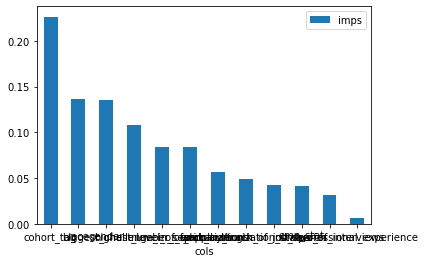

In [103]:
feat_imp=feat_imp.sort_values(by='imps',ascending=False)
feat_imp.plot.bar(x='cols',y='imps',rot=0)
print(feat_imp)


In [104]:
X_new2=X[feat_imp.iloc[0:5,0].tolist()]
y_new2=y

## Recursive Feature Elimination CV Classification

In [105]:
y=data3['placed']
X=data3.drop(columns=['pathrise_status','id','program_duration_days','placed'])

X.to_csv("Data_Pathrise3.csv", index=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)


[2 1 1 1 1 1 1 1 1 3 1 1]
Optimal number of features : 10


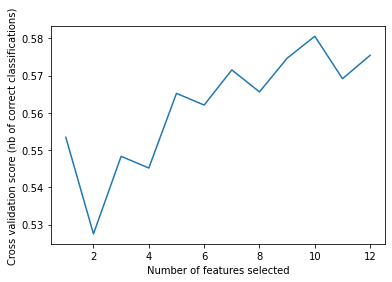

In [106]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier


# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
#rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
#              scoring='accuracy')

rf=RandomForestClassifier(n_estimators=10,n_jobs=16)


rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')

rfecv.fit(X, y)

print(rfecv.ranking_)
x0=rfecv.ranking_

a=X.columns.tolist()
b=len(a)
pda= pd.DataFrame(index=range(b),columns=range(2 ))
pda.columns = [ 'p1', 'p2']
pda.iloc[:,0]=x0
pda.iloc[:,1]=a

#print(pda)
pda=pda.sort_values(by=['p1'])
#print(pda)


print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [107]:
print(pda.iloc[0:rfecv.n_features_,1].tolist())
X_new3=X[pda.iloc[0:rfecv.n_features_,1].tolist()]
y_new3=y

['cohort_tag', 'highest_level_of_education', 'length_of_job_search', 'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status', 'number_of_interviews', 'number_of_applications', 'race', 'emp_stat']


## Recursive Feature Elimination CV Regression

In [108]:

y=data3['program_duration_days']
X=data3.drop(columns=['pathrise_status','id','program_duration_days','placed'])

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

[ 9  1  7 11  5 12 10  4  6  3  2  8]
Optimal number of features : 1


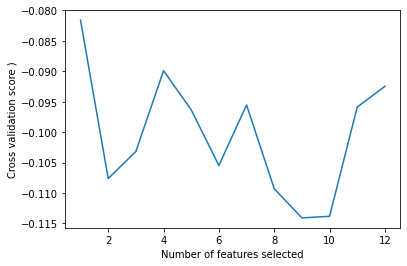

In [109]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error

# Create the RFE object and compute a cross-validated score.
regr = AdaBoostRegressor(random_state=0, n_estimators=10)


rfecv = RFECV(estimator=regr, step=1,cv=StratifiedKFold(2)   )

rfecv.fit(X, y)
print(rfecv.ranking_)

x0=rfecv.ranking_

a=X.columns.tolist()
b=len(a)
pda= pd.DataFrame(index=range(b),columns=range(2 ))
pda.columns = [ 'p1', 'p2']
pda.iloc[:,0]=x0
pda.iloc[:,1]=a

#print(pda)
pda=pda.sort_values(by=['p1'])
#print(pda)


print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score )")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [110]:
print(pda.iloc[0:rfecv.n_features_,1].tolist())
X_new4=X[pda.iloc[0:rfecv.n_features_,1].tolist()]
y_new4=y

['cohort_tag']


## SelectModel feature selection for Classification

In [111]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor


In [112]:
y=data3['placed']

X=data3.drop(columns=['pathrise_status','id','program_duration_days','placed'])

print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

(2544, 12)


In [113]:
selector = SelectFromModel(estimator=RandomForestClassifier(n_estimators=10,n_jobs=-1)).fit(X, y)
X_new5 =selector.transform(X)
y_new5=y
X_new5.shape




(2544, 4)

## SelectModel feature selection for Regression

In [114]:

y=data3['program_duration_days']
X=data3.drop(columns=['pathrise_status','id','program_duration_days','placed'])

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

In [115]:
selector = SelectFromModel(estimator=AdaBoostRegressor()).fit(X, y)
X_new6 =selector.transform(X)
y_new6=y
X_new6.shape


(2544, 6)

## Hyperparameter Optimization

In [ ]:
After determining the features to include in our classification and regression models we tune the parameters of each model

in an Hyperparameter optimization step to further tune the performance of the models. The optimized parameters are used to 

build the three classification and three rgression models. 

In [116]:
# import numpy as np

import scipy.stats as stats
from sklearn.utils.fixes import loguniform

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor


clf = RandomForestClassifier(n_estimators=10,n_jobs=60)
clf1 = AdaBoostRegressor(n_estimators=10)


# specify parameters and distributions to sample from

param_dist1 = {'max_features': stats.uniform(0, 1),
              'max_depth': stats.uniform(0, 1),
              'min_samples_split': loguniform(1e-4, 1e0)}

param_dist2 = {'learning_rate': stats.uniform(0, 1)  }



# run randomized search
n_iter_search = 20
random_search1 = RandomizedSearchCV(clf, param_distributions=param_dist1,
                                   n_iter=n_iter_search)

random_search2 = RandomizedSearchCV(clf1, param_distributions=param_dist2,
                                   n_iter=n_iter_search)

random_search3 = RandomizedSearchCV(clf, param_distributions=param_dist1,
                                   n_iter=n_iter_search)

random_search4 = RandomizedSearchCV(clf1, param_distributions=param_dist2,
                                   n_iter=n_iter_search)

random_search5 = RandomizedSearchCV(clf, param_distributions=param_dist1,
                                   n_iter=n_iter_search)

random_search6 = RandomizedSearchCV(clf1, param_distributions=param_dist2,
                                   n_iter=n_iter_search)

random_search1.fit(X_new1, y_new1)
random_search2.fit(X_new2, y_new2)

random_search3.fit(X_new3, y_new3)
random_search4.fit(X_new4, y_new4)

random_search5.fit(X_new5, y_new5)
random_search6.fit(X_new6, y_new6)

model1_params=random_search1.best_params_
model2_params=random_search2.best_params_
model3_params=random_search3.best_params_
model4_params=random_search4.best_params_
model5_params=random_search5.best_params_
model6_params=random_search6.best_params_

print(model1_params)
#print(model2_params)
#print(model1_params['max_depth'])

print('................................')


{'max_depth': 0.20762436971034903, 'max_features': 0.7059837919830526, 'min_samples_split': 0.007936688958798113}
................................


In this section we use the features and parameters determined in the previous two sections to build our learning models

determine their key performance metric and save the models to file for later use. While the aim is to use the models 

developed for future predictions its also possible to obtain prediction probabilities for each new applicant we want to

predict outcomes for. For example we may determine that a new applicant to the pathrise program will be placed with a

probability of 0.6 or that determine that with probability 0.8 that a new applicant will spend less than 30 days in the

program. It would be interesting to find out what these two models predict for the current auther who is also aspiring

to be a fellow. This is a task to be taken up later.



## Final Models,Their Metric and Model Persistence

In [53]:
from sklearn import svm
from sklearn import datasets
from joblib import dump, load
from sklearn.metrics import confusion_matrix

#model1 

X_train, X_test, y_train, y_test = train_test_split(X_new1, y_new1, test_size=0.3,random_state=0)

rf=RandomForestClassifier(n_estimators=10,min_samples_split=model1_params['min_samples_split'],max_depth=model1_params['max_depth'],max_features=model1_params['max_features'],n_jobs=16)
rf.fit(X_train, y_train)

#print(rf.predict(X_train))


print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, rf.predict(X_train)))
print('Precision:', precision_score(y_train, rf.predict(X_train)))
print('Recall:', recall_score(y_train, rf.predict(X_train)))


print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, rf.predict(X_test)))
print('Precision:', precision_score(y_test, rf.predict(X_test)))
print('Recall:', recall_score(y_test, rf.predict(X_test)))

confusion_matrix(y_test, rf.predict(X_test))


dump(rf, 'model1.joblib')
#rf = load('filename.joblib') 




Training set metrics:
Accuracy: 0.6146067415730337
Precision: 0.0
Recall: 0.0
Test set metrics:
Accuracy: 0.6465968586387435
Precision: 0.0
Recall: 0.0


['model1.joblib']

In [54]:
#model2

X_train, X_test, y_train, y_test = train_test_split(X_new2, y_new2, test_size=0.3,random_state=0)
regr = AdaBoostRegressor(random_state=0,learning_rate=model2_params['learning_rate'], n_estimators=10)
regr.fit(X_train, y_train)

print('Training set metrics:')
print('Explained_variance_score:', explained_variance_score(y_train, regr.predict(X_train)))
print('mean_absolute_error:', mean_absolute_error(y_train, regr.predict(X_train)))
print('mean_squared_error:', mean_squared_error(y_train, regr.predict(X_train)))


print('Test set metrics:')

print('Explained_variance_score:', explained_variance_score(y_test, regr.predict(X_test)))
print('mean_absolute_error:', mean_absolute_error(y_test, regr.predict(X_test)))
print('mean_squared_error:', mean_squared_error(y_test, regr.predict(X_test)))

dump(regr, 'model2.joblib')


Training set metrics:
Explained_variance_score: 0.01893744057997393
mean_absolute_error: 103.1250297487914
mean_squared_error: 15174.960750123817
Test set metrics:
Explained_variance_score: 0.003735777429738185
mean_absolute_error: 103.65963942383758
mean_squared_error: 15179.810545149889


['model2.joblib']

In [55]:
#model3 

from sklearn import svm
from sklearn import datasets
from joblib import dump, load
from sklearn.metrics import confusion_matrix



X_train, X_test, y_train, y_test = train_test_split(X_new3, y_new3, test_size=0.3,random_state=0)

rf=RandomForestClassifier(n_estimators=10,min_samples_split=model3_params['min_samples_split'],max_depth=model3_params['max_depth'],max_features=model3_params['max_features'],n_jobs=16)
rf.fit(X_train, y_train)

#print(rf.predict(X_train))


print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, rf.predict(X_train)))
print('Precision:', precision_score(y_train, rf.predict(X_train)))
print('Recall:', recall_score(y_train, rf.predict(X_train)))


print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, rf.predict(X_test)))
print('Precision:', precision_score(y_test, rf.predict(X_test)))
print('Recall:', recall_score(y_test, rf.predict(X_test)))

confusion_matrix(y_test, rf.predict(X_test))



dump(rf, 'model3.joblib')
#rf = load('filename.joblib') 

Training set metrics:
Accuracy: 0.6146067415730337
Precision: 0.0
Recall: 0.0
Test set metrics:
Accuracy: 0.6465968586387435
Precision: 0.0
Recall: 0.0


['model3.joblib']

In [56]:
#model4

X_train, X_test, y_train, y_test = train_test_split(X_new4, y_new4, test_size=0.3,random_state=0)
regr = AdaBoostRegressor(random_state=0,learning_rate=model2_params['learning_rate'], n_estimators=10)
regr.fit(X_train, y_train)

print('Training set metrics:')
print('Explained_variance_score:', explained_variance_score(y_train, regr.predict(X_train)))
print('mean_absolute_error:', mean_absolute_error(y_train, regr.predict(X_train)))
print('mean_squared_error:', mean_squared_error(y_train, regr.predict(X_train)))


print('Test set metrics:')

print('Explained_variance_score:', explained_variance_score(y_test, regr.predict(X_test)))
print('mean_absolute_error:', mean_absolute_error(y_test, regr.predict(X_test)))
print('mean_squared_error:', mean_squared_error(y_test, regr.predict(X_test)))

dump(regr, 'model4.joblib')


Training set metrics:
Explained_variance_score: 0.021386603577778662
mean_absolute_error: 102.95411044964396
mean_squared_error: 15137.439733624902
Test set metrics:
Explained_variance_score: 0.02043516668466705
mean_absolute_error: 102.47061526627151
mean_squared_error: 14937.642943668014


['model4.joblib']

In [57]:
#model5 

from sklearn import svm
from sklearn import datasets
from joblib import dump, load
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_new5, y_new5, test_size=0.3,random_state=0)

rf=RandomForestClassifier(n_estimators=10,min_samples_split=model5_params['min_samples_split'],max_depth=model5_params['max_depth'],max_features=model5_params['max_features'],n_jobs=16)
rf.fit(X_train, y_train)

#print(rf.predict(X_train))


print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, rf.predict(X_train)))
print('Precision:', precision_score(y_train, rf.predict(X_train)))
print('Recall:', recall_score(y_train, rf.predict(X_train)))


print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, rf.predict(X_test)))
print('Precision:', precision_score(y_test, rf.predict(X_test)))
print('Recall:', recall_score(y_test, rf.predict(X_test)))

confusion_matrix(y_test, rf.predict(X_test))


dump(rf, 'model5.joblib')
#rf = load('filename.joblib') 

Training set metrics:
Accuracy: 0.6146067415730337
Precision: 0.0
Recall: 0.0
Test set metrics:
Accuracy: 0.6465968586387435
Precision: 0.0
Recall: 0.0


['model5.joblib']

In [58]:
#model6

X_train, X_test, y_train, y_test = train_test_split(X_new6, y_new6, test_size=0.3,random_state=0)
regr = AdaBoostRegressor(random_state=0,learning_rate=model2_params['learning_rate'], n_estimators=10)
regr.fit(X_train, y_train)

print('Training set metrics:')
print('Explained_variance_score:', explained_variance_score(y_train, regr.predict(X_train)))
print('mean_absolute_error:', mean_absolute_error(y_train, regr.predict(X_train)))
print('mean_squared_error:', mean_squared_error(y_train, regr.predict(X_train)))


print('Test set metrics:')

print('Explained_variance_score:', explained_variance_score(y_test, regr.predict(X_test)))
print('mean_absolute_error:', mean_absolute_error(y_test, regr.predict(X_test)))
print('mean_squared_error:', mean_squared_error(y_test, regr.predict(X_test)))

dump(regr, 'model6.joblib')


Training set metrics:
Explained_variance_score: 0.017998941642781707
mean_absolute_error: 103.40223988736722
mean_squared_error: 15190.531493355023
Test set metrics:
Explained_variance_score: 0.016349902965875462
mean_absolute_error: 103.27656937961036
mean_squared_error: 15017.867843422966


['model6.joblib']

## Model Restoration and use to predict new samples

In [59]:
from joblib import dump, load

model1 = load('model1.joblib')
model2 = load('model2.joblib')
model3 = load('model3.joblib')
model4 = load('model4.joblib')
model5 = load('model5.joblib')
model6 = load('model6.joblib')

#X_newsamples=

#model1_prediction = model1.predict(X_newsamples)
#model2_prediction = model2.predict(X_newsamples)
#model3_prediction = model3.predict(X_newsamples)
#model4_prediction = model4.predict(X_newsamples)
#model5_prediction = model5.predict(X_newsamples)
#model6_prediction = model6.predict(X_newsamples)




## Conclusion

In this project we have gone through all stages of a data mining and/or predictive analytics endeavor aimed at deriving insights from data. We started by loading our given dataset and observing several of it prominent characteristics. we then proceeded to exploratory data analysis which enabled us to get an overview of the dataset as well as obtain further
insights into the dataset in visual form by way of graphs, frequency tables etc. These step is a very important step of every data mining endeavor and should be included always. In the next sections we enter the predictive analytics part of the project which involves trying to use the variables in the dataset to predict other variables therein. In this case we would like to predict whether an applicant will be placed or not and the length of time an applicant will spend in the program.

The first of this task is a classification problem while the second is a regression problem. By going through the phases of preprocessing, missing values imputation, categorical data encoding, feature importance and selection, hyperparameter optimization, modelling, model evaluation and model persistence we carried out an end to end procedure for all the steps required in predictive analytics. The emphasis in this project is on the procedures and tools available to the data data scientist and machine learing professional rather than on the accuracy of the prediction and statistical models used. 
However, Possible uses of this sort of analysis may be used to reveal inhenrent and unconcious biase in selection and placement of fellows. It would be interesting to see how the placement rates for Phd fellows compares to the general population of fellows keeping in mind that there may be other factors at play that ultimately decides any one individual's outcome in the program
that may not have been presented in the dataset.





### Adeseye Agbabiaka,Phd